# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from pandas.io import sql

sqlite_db = '../../assets/datasets/adult.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()

fields = c.execute("SELECT sql from sqlite_master WHERE type='table';").fetchall()



In [2]:
print(fields)


[(u'CREATE TABLE "SELECT * FROM adult;" (\n"index" INTEGER,\n  "age" INTEGER,\n  "workclass" TEXT,\n  "fnlwgt" INTEGER,\n  "education" TEXT,\n  "education-num" INTEGER,\n  "marital-status" TEXT,\n  "occupation" TEXT,\n  "relationship" TEXT,\n  "race" TEXT,\n  "sex" TEXT,\n  "capital-gain" INTEGER,\n  "capital-loss" INTEGER,\n  "hours-per-week" INTEGER,\n  "native-country" TEXT,\n  "salary" TEXT\n)',), (u'CREATE TABLE "adult" (\n"age" INTEGER,\n  "workclass" TEXT,\n  "fnlwgt" INTEGER,\n  "education" TEXT,\n  "education-num" INTEGER,\n  "marital-status" TEXT,\n  "occupation" TEXT,\n  "relationship" TEXT,\n  "race" TEXT,\n  "sex" TEXT,\n  "capital-gain" INTEGER,\n  "capital-loss" INTEGER,\n  "hours-per-week" INTEGER,\n  "native-country" TEXT,\n  "salary" TEXT\n)',)]


In [3]:
adult = pd.read_sql("SELECT * from adult", con=conn)
adult.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [4]:
cols = adult.columns
for h in cols:
    print(adult[h].value_counts())
    
#capital-gain has 44807 values of 0, capital-loss 46560 of 0


36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
120277    19
190290    19
125892    18
126569    18
99

In [5]:
#check for nulls
print(100*(float(len(adult))-float(48841))/float(48841),'is % of nulls we dropped')
adult.info()




(0.0020474601257140517, 'is % of nulls we dropped')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [6]:
adult = adult.dropna()
print(100*(float(len(adult))-float(48841))/float(48841),'is % of nulls we dropped')
adult.info()


(-7.409758194959153, 'is % of nulls we dropped')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education-num     45222 non-null int64
marital-status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null object
salary            45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [7]:
dumdum = pd.get_dummies(adult['salary'])
adults = pd.concat([adult, dumdum], axis=1)
adults['over_50k'] = adults['>50K']
adults.drop(['salary', '<=50K', '>50K'], inplace=1, axis=1)
adults.head()
target = adults['over_50k'] ==1


# df = pd.DataFrame(data=my_data, columns=['y', 'dummy', 'x'])
# just_dummies = pd.get_dummies(df['dummy'])

# step_1 = pd.concat([df, just_dummies], axis=1)      
# step_1.drop(['dummy', 'c'], inplace=True, axis=1)


In [8]:
adults.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

> Some and some

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

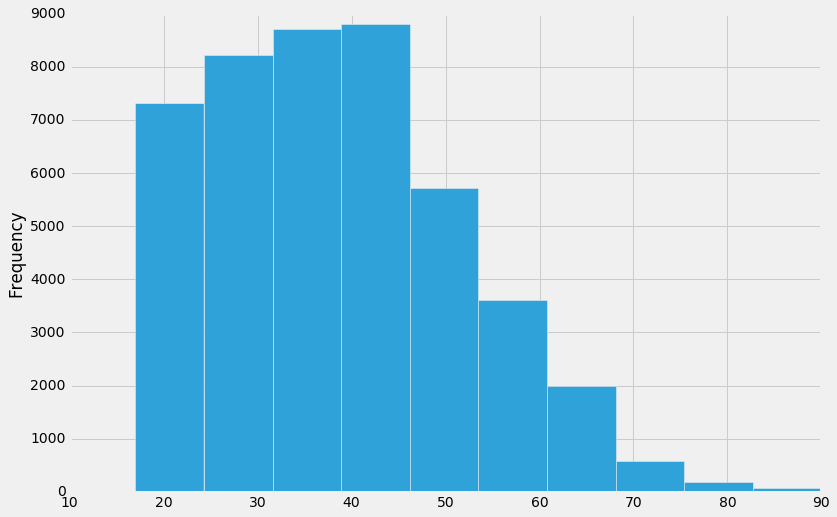

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plot.style.use('fivethirtyeight')

adults['age'].plot.hist(figsize=(12,8)) #removed bin arguement to default

In [10]:
over50k_jobs = adults[adults['over_50k'] == 1]
under50k_jobs = adults[adults['over_50k'] == 0]

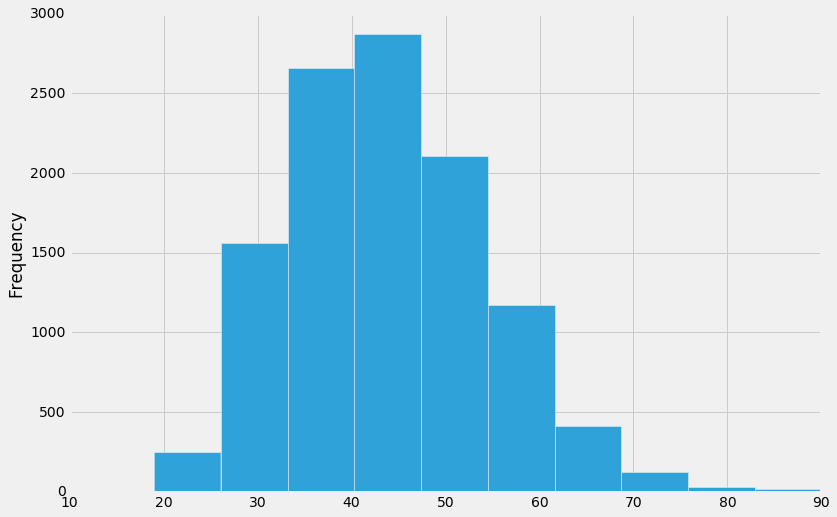

In [11]:
over50k_jobs['age'].plot.hist(figsize=(12,8))

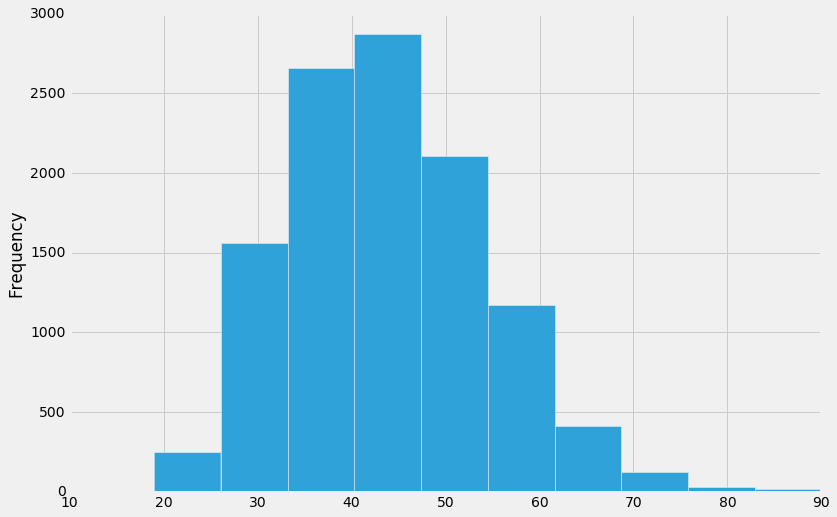

In [12]:
over50k_jobs['age'].plot.hist(figsize=(12,8))

The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

In [13]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
# ind = adults['workclass'].unique()
# overs = ax.bar(ind, over50k_jobs.workclass, color='r')
# unders = ax.bar(ind, under50k_jobs.workclass, color='r')
# ax.set_ylabel('workclass')
# ax.set_title('Class of Work and Associated Pay')
# plt.show()

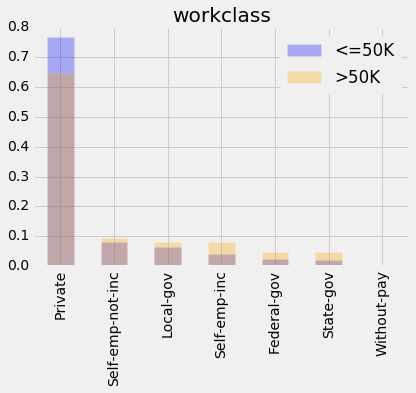

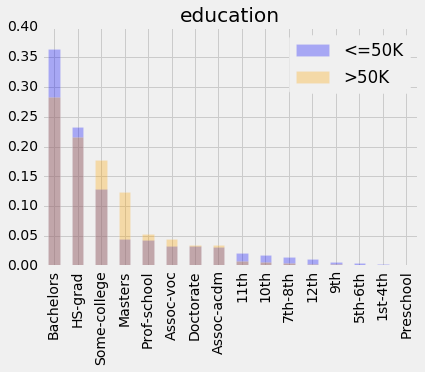

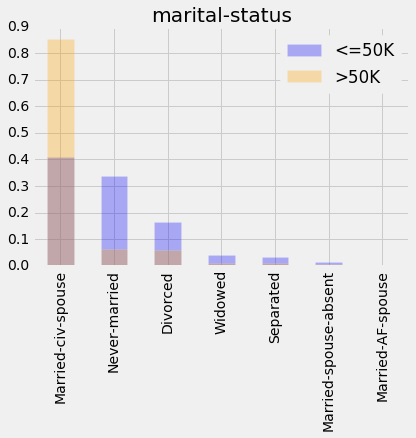

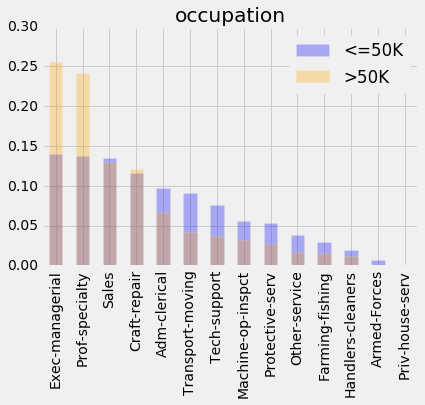

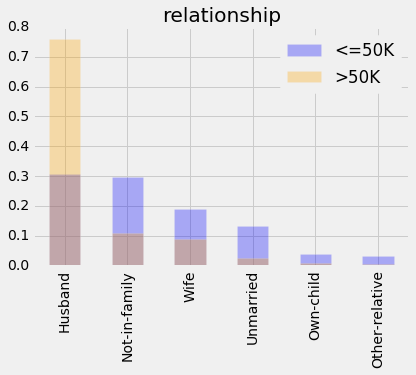

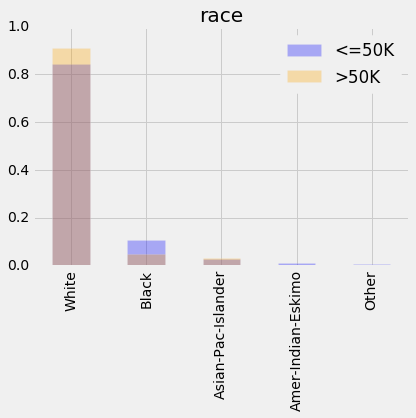

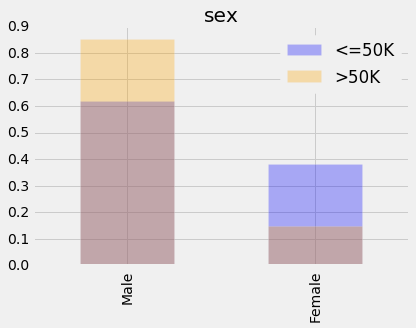

In [24]:
#peeking at solution code below:

catcols = [u'workclass', u'education', u'marital-status',
           u'occupation', u'relationship', u'race', u'sex']

for c in catcols:
    plt.figure()
    (adults.loc[~target,c].value_counts() / adults.loc[~target,c].count()).plot(kind='bar', alpha = 0.3, color = 'blue')
    (adults.loc[target,c].value_counts() / adults.loc[target,c].count()).plot(kind='bar', alpha = 0.3, color = 'orange')
    plt.legend(['<=50K', '>50K'])
    plt.title(c)


In [ ]:
# import seaborn as sns


# workclasspiv = adults.pivot(index='workclass')
# workclasspiv.head()

# # df.pivot(index='date', columns='variable', values='value')

# # sns.barplot(x='workclass', y=, hue='over_50k', data=adults)

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [21]:
adult_X = adults.iloc[:,0:14]
adult_X_2 = adults.iloc[:,0:13]
adult_X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [23]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

hotone = OneHotEncoder()
hotone.fit(adult_X_2, target)

ValueError: invalid literal for long() with base 10: 'Male'

## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

## 6. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams
